In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
import gym
from gym import spaces
import random
from collections import deque, defaultdict

In [3]:
from glob import glob

In [4]:
import pickle

In [5]:
import json

In [6]:
def categorical_to_number(data, variables):
    """
    Receives a list of variables and a dataset for replacement of categorical values by numbers.
    Outputs dictionaries with the old values and teh new ones.
    """
    
    for v in variables:
        values = list(set(data[v]))
        values = [x for x in values if pd.notna(x)]
        values.sort()
        replace = {value: idx for idx, value in enumerate(values)}
        data[v].replace(replace, inplace = True)
        v = v.replace("/","_")
        with open(f'{v}.json','w') as file:
            json.dump(replace, file, indent = 4)
    return data

In [7]:
# Load the dataset
file_path1 = glob(f"./day*.csv")
file_path2 = glob(f"./poison*.csv")

In [8]:
file_path1 = sorted(file_path1, key=lambda x: int(x[5:].split('.')[0]))

In [9]:
file_path1

['./day8.csv',
 './day9.csv',
 './day10.csv',
 './day11.csv',
 './day12.csv',
 './day13.csv',
 './day14.csv']

In [10]:
file_path2 = sorted(file_path2, key=lambda x: int(x[8:].split('.')[0]))
file_path2

['./poison8.csv',
 './poison9.csv',
 './poison10.csv',
 './poison11.csv',
 './poison12.csv',
 './poison13.csv',
 './poison14.csv']

In [11]:
data1 = [pd.read_csv(x) for x in file_path1]
data2 = [pd.read_csv(x) for x in file_path2]

In [12]:
def preprocess_data(df):
    df['Weekday/Weekend'] = df['Weekday/Weekend'].replace({"Weekday": 0, "Weekend": 1})
    df = categorical_to_number(df,['Hour'])
    # Extract state and action data
    state_data = df[['Hour', 'Weekday/Weekend','Presence Detector', 'Face Recognition', 'Weapon Recognition']].values
    actions = df['Action'].values
    
    return state_data, actions

In [13]:
# Preprocess the dataset
#state_data_N, actions_N = preprocess_data(data1)
state_data_N = []
actions_N = []
ds1 = data1.copy()
for d in ds1:
    a, b = preprocess_data(d)
    state_data_N.append(a)
    actions_N.append(b)
    

In [14]:
state_data_N

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [15]:
len(state_data_N[6])

144

In [16]:
len(state_data_N)

7

In [17]:
actions_N

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

In [18]:
# Preprocess the dataset
#state_data_P, actions_P = preprocess_data(data2)
state_data_P = []
actions_P = []
ds2 = data2.copy()
for d in ds2:
    a, b = preprocess_data(d)
    state_data_P.append(a)
    actions_P.append(b)
    

In [19]:
state_data_P

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [20]:
#np.zeros(state_data_N[0].shape[1])

In [21]:
class RealTimeEnvironment(gym.Env):
    def __init__(self, state_data_N, actions_N, state_data_P, actions_P):
        super(RealTimeEnvironment, self).__init__()
        self.state_data_N = state_data_N
        self.actions_data_N = actions_N
        self.state_data_P = state_data_P
        self.actions_data_P = actions_P
        self.current_step = 0
        self.correct = []
        self.index = 0

        # Define observation space (4 features: Timestamp, Presence Sensor, Persons Recognized, Weapon Detected)
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        
        # Action space: 2 actions (0: do nothing, 2: inform owner and police)
        self.action_space = spaces.Discrete(2)
        
    def reset_N(self):
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        #print(f"self.index = {self.index}")
        return self.state_data_N[self.index][self.current_step]
    
    def reset_P(self):
        self.current_step = 0
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        return self.state_data_P[self.index][self.current_step]

    def step_N(self, action):
        correct_action = int(self.actions_data_N[self.index][self.current_step])
        #print(f"Action: {action} --- Gabarito: {correct_action}")
        self.correct.append(correct_action)
        #reward = 1 if action == correct_action else -1
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            if correct_action == 1 and action == 0: 
                reward = -20
            else:
                reward = -1
                print(f"Action = {action} -- O correto = {correct_action}")
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_N[self.index])
        
        # Get the next state
        if not done:
            next_state = self.state_data_N[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            if self.index <= 6:
                self.index += 1
            else:
                self.index = 0
            #next_state = self.state_data_N[self.index][0]
        return next_state, reward, done, {}
    
    def step_P(self, action):
        correct_action = int(self.actions_data_P[self.index][self.current_step])
        self.correct.append(correct_action)
        
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_P[self.index])
        
        # Get the next state
        if not done: 
            next_state = self.state_data_P[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            #next_state = np.zeros(self.state_data_P.shape[1])
            
        
        return next_state, reward, done, {}
    
    def render_N(self):
        print(f"Step: {self.current_step}, State: {self.state_data_N[self.current_step]}")
        
    def render_P(self):
        print(f"Step: {self.current_step}, State: {self.state_data_P[self.current_step]}")

In [22]:
# Initialize the environment
env = RealTimeEnvironment(state_data_N, actions_N, state_data_P, actions_P)

In [23]:
env.index

0

In [24]:
# Initialize Q-table using a defaultdict for easy default values
#q_table = defaultdict(lambda: [0, 0])  # Two actions, initialized to zero

In [25]:
with open("q_table_normal.pkl", "rb") as f:
    q_table = pickle.load(f)

In [26]:
# Reconvertendo para defaultdict
q_table = defaultdict(lambda: [0, 0], q_table)

In [27]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(1, 0, 0, 0, 0): [46.293260184365685, 21.9947447107481],
             (0, 0, 0, 0, 0): [46.35110164538535, 23.90403071607307],
             (2, 0, 0, 0, 0): [46.237138590083745, 25.123909641529092],
             (3, 0, 0, 0, 0): [46.17943791694044, 22.267053158047087],
             (4, 0, 0, 0, 0): [46.12161552511525, 21.880404482397616],
             (5, 0, 0, 0, 0): [46.06555174690786, 19.96532538175137],
             (6, 0, 0, 0, 0): [46.010619969712536, 21.02995721658848],
             (7, 0, 0, 0, 0): [45.95624819264886, 18.44983121829008],
             (8, 0, 0, 0, 0): [45.90204512117404, 20.176969993959062],
             (9, 0, 0, 0, 0): [45.84793747789589, 22.605141948951925],
             (10, 0, 0, 0, 0): [45.79406656427323, 23.29772009703375],
             (11, 0, 0, 0, 0): [45.740336446110824, 24.973945815459388],
             (12, 0, 0, 0, 0): [45.68588202561175, 20.4248861829697],
             (13, 0, 0, 0, 0): [45.

In [28]:
state = env.reset_N()  # Ou `env.reset_P()` dependendo do cenário
state = tuple(state)
done = False
env.index = 0
# Metrics for tracking performance
reward_history = deque(maxlen=2016)
action_accuracy = deque(maxlen=2016)

In [29]:
env.index

0

In [30]:
poison = False
avg_reward = []
suc_rate = []
epsilon = []
index = 0
episode = 0
episode_reward = 0
while True:
    
    #print(f"Episode reward : {episode_reward}")
    # Escolher a melhor ação (exploração)
    action = np.argmax(q_table[tuple(state)])
    
    # Realizar a ação no ambiente
    next_state, reward, done, _ = env.step_N(action)  # Use step_P para outro cenário
    next_state = tuple(next_state)
    
    if reward < 0:
        print(f"state = {state} -- Reward = {reward}")

    #print(f"Estado: {state}, Ação: {action}, Recompensa: {reward}")
    state = next_state
    episode_reward += reward
    #action_accuracy.append(1 if reward == 1 else 0)  # Track if action was correct
    action_accuracy.append(1 if reward > 0 else 0)  # Track if action was correct
    
    
    
    
    if index % 143 == 0 and index != 0:
        reward_history.append(episode_reward)
        average_reward = np.mean(reward_history)
        success_rate = np.mean(action_accuracy)
        avg_reward.append(average_reward)
        suc_rate.append(success_rate)
        print(f"Episode {episode}: Avg Reward = {average_reward:.2f}, Success Rate = {success_rate:.5f}")
        episode += 1
        state = env.reset_N() if poison == False else env.reset_P()
        episode_reward = 0
        
    if episode == 1000:
        break 
    
    index += 1   

Episode 0: Avg Reward = 182.00, Success Rate = 1.00000
Episode 1: Avg Reward = 181.50, Success Rate = 1.00000
Episode 2: Avg Reward = 244.67, Success Rate = 1.00000
Episode 3: Avg Reward = 247.75, Success Rate = 1.00000
Episode 4: Avg Reward = 283.80, Success Rate = 1.00000
Episode 5: Avg Reward = 383.83, Success Rate = 1.00000
Episode 6: Avg Reward = 354.86, Success Rate = 1.00000
Episode 7: Avg Reward = 333.12, Success Rate = 1.00000
Episode 8: Avg Reward = 316.22, Success Rate = 1.00000
Episode 9: Avg Reward = 321.70, Success Rate = 1.00000
Episode 10: Avg Reward = 315.82, Success Rate = 1.00000
Episode 11: Avg Reward = 325.17, Success Rate = 1.00000
Episode 12: Avg Reward = 368.15, Success Rate = 1.00000
Episode 13: Avg Reward = 354.79, Success Rate = 1.00000
Episode 14: Avg Reward = 343.20, Success Rate = 1.00000
Episode 15: Avg Reward = 333.06, Success Rate = 1.00000
Episode 16: Avg Reward = 335.29, Success Rate = 1.00000
Episode 17: Avg Reward = 330.94, Success Rate = 1.00000
Ep

Episode 289: Avg Reward = 353.58, Success Rate = 1.00000
Episode 290: Avg Reward = 353.24, Success Rate = 1.00000
Episode 291: Avg Reward = 353.50, Success Rate = 1.00000
Episode 292: Avg Reward = 355.31, Success Rate = 1.00000
Episode 293: Avg Reward = 354.72, Success Rate = 1.00000
Episode 294: Avg Reward = 354.13, Success Rate = 1.00000
Episode 295: Avg Reward = 353.54, Success Rate = 1.00000
Episode 296: Avg Reward = 353.60, Success Rate = 1.00000
Episode 297: Avg Reward = 353.28, Success Rate = 1.00000
Episode 298: Avg Reward = 353.53, Success Rate = 1.00000
Episode 299: Avg Reward = 355.30, Success Rate = 1.00000
Episode 300: Avg Reward = 354.72, Success Rate = 1.00000
Episode 301: Avg Reward = 354.14, Success Rate = 1.00000
Episode 302: Avg Reward = 353.57, Success Rate = 1.00000
Episode 303: Avg Reward = 353.63, Success Rate = 1.00000
Episode 304: Avg Reward = 353.31, Success Rate = 1.00000
Episode 305: Avg Reward = 353.56, Success Rate = 1.00000
Episode 306: Avg Reward = 355.2

Episode 511: Avg Reward = 354.38, Success Rate = 1.00000
Episode 512: Avg Reward = 354.04, Success Rate = 1.00000
Episode 513: Avg Reward = 354.07, Success Rate = 1.00000
Episode 514: Avg Reward = 353.88, Success Rate = 1.00000
Episode 515: Avg Reward = 354.03, Success Rate = 1.00000
Episode 516: Avg Reward = 355.05, Success Rate = 1.00000
Episode 517: Avg Reward = 354.72, Success Rate = 1.00000
Episode 518: Avg Reward = 354.38, Success Rate = 1.00000
Episode 519: Avg Reward = 354.05, Success Rate = 1.00000
Episode 520: Avg Reward = 354.08, Success Rate = 1.00000
Episode 521: Avg Reward = 353.89, Success Rate = 1.00000
Episode 522: Avg Reward = 354.04, Success Rate = 1.00000
Episode 523: Avg Reward = 355.05, Success Rate = 1.00000
Episode 524: Avg Reward = 354.72, Success Rate = 1.00000
Episode 525: Avg Reward = 354.39, Success Rate = 1.00000
Episode 526: Avg Reward = 354.06, Success Rate = 1.00000
Episode 527: Avg Reward = 354.09, Success Rate = 1.00000
Episode 528: Avg Reward = 353.9

Episode 657: Avg Reward = 354.72, Success Rate = 1.00000
Episode 658: Avg Reward = 354.45, Success Rate = 1.00000
Episode 659: Avg Reward = 354.19, Success Rate = 1.00000
Episode 660: Avg Reward = 354.21, Success Rate = 1.00000
Episode 661: Avg Reward = 354.07, Success Rate = 1.00000
Episode 662: Avg Reward = 354.18, Success Rate = 1.00000
Episode 663: Avg Reward = 354.98, Success Rate = 1.00000
Episode 664: Avg Reward = 354.72, Success Rate = 1.00000
Episode 665: Avg Reward = 354.45, Success Rate = 1.00000
Episode 666: Avg Reward = 354.19, Success Rate = 1.00000
Episode 667: Avg Reward = 354.22, Success Rate = 1.00000
Episode 668: Avg Reward = 354.07, Success Rate = 1.00000
Episode 669: Avg Reward = 354.19, Success Rate = 1.00000
Episode 670: Avg Reward = 354.97, Success Rate = 1.00000
Episode 671: Avg Reward = 354.72, Success Rate = 1.00000
Episode 672: Avg Reward = 354.46, Success Rate = 1.00000
Episode 673: Avg Reward = 354.20, Success Rate = 1.00000
Episode 674: Avg Reward = 354.2

Episode 882: Avg Reward = 354.52, Success Rate = 1.00000
Episode 883: Avg Reward = 354.32, Success Rate = 1.00000
Episode 884: Avg Reward = 354.34, Success Rate = 1.00000
Episode 885: Avg Reward = 354.23, Success Rate = 1.00000
Episode 886: Avg Reward = 354.31, Success Rate = 1.00000
Episode 887: Avg Reward = 354.91, Success Rate = 1.00000
Episode 888: Avg Reward = 354.72, Success Rate = 1.00000
Episode 889: Avg Reward = 354.52, Success Rate = 1.00000
Episode 890: Avg Reward = 354.33, Success Rate = 1.00000
Episode 891: Avg Reward = 354.34, Success Rate = 1.00000
Episode 892: Avg Reward = 354.24, Success Rate = 1.00000
Episode 893: Avg Reward = 354.32, Success Rate = 1.00000
Episode 894: Avg Reward = 354.91, Success Rate = 1.00000
Episode 895: Avg Reward = 354.72, Success Rate = 1.00000
Episode 896: Avg Reward = 354.52, Success Rate = 1.00000
Episode 897: Avg Reward = 354.33, Success Rate = 1.00000
Episode 898: Avg Reward = 354.35, Success Rate = 1.00000
Episode 899: Avg Reward = 354.2

In [40]:
import matplotlib.pyplot as plt

In [42]:
episodes = [x for x in range(0,1000,20)]

In [44]:
avg = [x for x in avg_reward[::20]]

In [45]:
mode = ["inference_normal" for x in range(0,1000,20)]

In [48]:
dataset_plot = pd.DataFrame({'episodes': episodes, 'avg_reward': avg, 'mode': mode})

In [49]:
dataset_plot.to_csv('inference_normal_avg.csv', index = False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


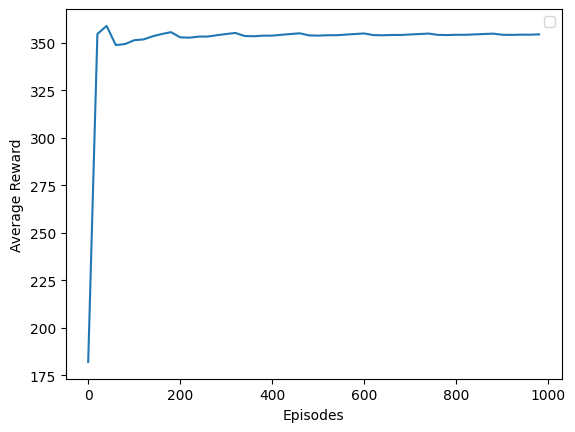

In [46]:
plt.plot(episodes,avg)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
#plt.savefig("Avg_normal_inference.png")

In [50]:
suc = [x for x in suc_rate[::20]]

In [51]:
success_plot = pd.DataFrame({'episodes':episodes, 'Success rate': suc, 'mode': mode})

In [52]:
success_plot.to_csv("inference_normal_suc.csv", index = False)

No handles with labels found to put in legend.


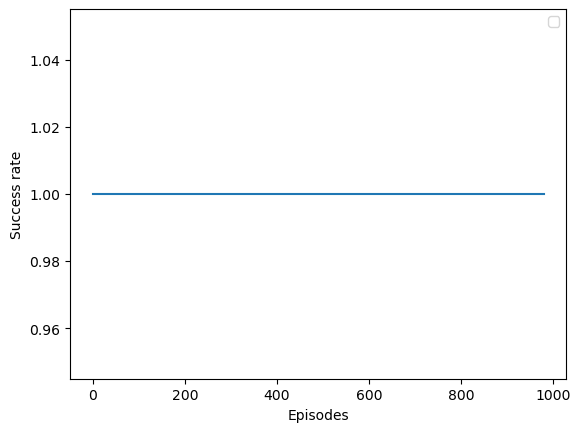

In [37]:
plt.plot(episodes,suc)
plt.xlabel('Episodes')
plt.ylabel('Success rate')
plt.legend()
#plt.savefig("suc_normal.png")

In [125]:
len(epsilon)

1000

No handles with labels found to put in legend.


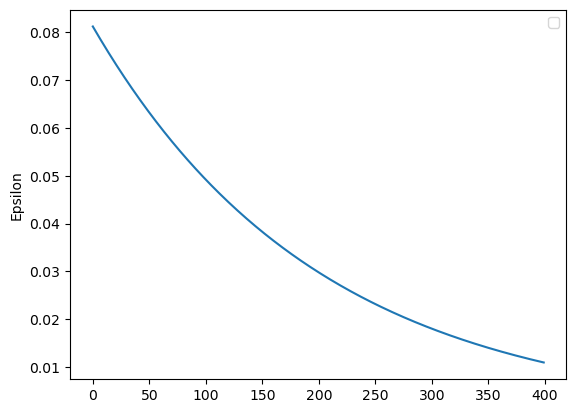

In [32]:
plt.plot(epsilon[500:900])
#plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.legend()
plt.savefig("epsilon_normal.png")

In [56]:
epsilon[500:600]

[0.0811640021330769,
 0.08075818212241151,
 0.08035439121179945,
 0.07995261925574046,
 0.07955285615946175,
 0.07915509187866444,
 0.07875931641927113,
 0.07836551983717477,
 0.07797369223798889,
 0.07758382377679894,
 0.07719590465791494,
 0.07680992513462537,
 0.07642587550895225,
 0.07604374613140748,
 0.07566352740075044,
 0.07528520976374668,
 0.07490878371492794,
 0.0745342397963533,
 0.07416156859737154,
 0.07379076075438468,
 0.07342180695061275,
 0.07305469791585968,
 0.07268942442628039,
 0.07232597730414898,
 0.07196434741762824,
 0.0716045256805401,
 0.0712465030521374,
 0.0708902705368767,
 0.07053581918419231,
 0.07018314008827135,
 0.06983222438783,
 0.06948306326589085,
 0.0691356479495614,
 0.06878996970981359,
 0.06844601986126451,
 0.06810378976195819,
 0.0677632708131484,
 0.06742445445908266,
 0.06708733218678724,
 0.0667518955258533,
 0.06641813604822402,
 0.0660860453679829,
 0.06575561514114299,
 0.06542683706543727,
 0.06509970288011008,
 0.06477420436570952,


In [57]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(9, 0, 0, 0): [91.16156166492583, 88.48133165642888],
             (0, 0, 0, 0): [91.27154784104732, 88.52143034257763],
             (19, 0, 0, 0): [91.04949229718942, 88.49138593310467],
             (29, 0, 0, 0): [90.93841890586829, 88.26712503531989],
             (39, 0, 0, 0): [90.83114398540826, 88.35966305840863],
             (49, 0, 0, 0): [90.72795984687136, 88.30241489162998],
             (59, 0, 0, 0): [90.62723461335692, 88.39399966287282],
             (69, 0, 0, 0): [90.52472565439504, 88.51489432200268],
             (79, 0, 0, 0): [90.420706545015, 88.39523769225903],
             (89, 0, 0, 0): [90.3522295755977, 87.79095613415146],
             (99, 0, 0, 0): [90.19016527211195, 88.03987180257656],
             (109, 0, 0, 0): [89.40050732077955, 87.29515578810324],
             (119, 0, 0, 0): [91.6794757049803, 88.92880060146807],
             (129, 0, 0, 0): [91.58366825948409, 89.0338811458372],
        